## Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [2]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/property_data_clustering_clean.csv"
df = pd.read_csv(url)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [3]:
# rename column
df = df.rename(columns={"Area Category": "AreaCategory", "Luas Tanah (m2)": "LuasTanahM2", "Luas Bangunan (m2)": "LuasBangunanM2", "Jumlah Kamar": "JumlahKamar", "Jumlah Kamar Mandi": "JumlahKamarMandi", "Tingkat/Lantai ": "TingkatLantai", "Harga Penawaran (dari Owner)": "HargaPenawaran", "Terjual/Belum": "TerjualBelum", "Arah Hadap Rumah": "ArahHadapRumah", "Posisi Rumah": "PosisiRumah", "Lebar Jalan Depan Rumah (ROW)": "LebarJalanROW"})
df.head()

,AreaCategory,Nama Daerah,LuasTanahM2,LuasBangunanM2,JumlahKamar,JumlahKamarMandi,TingkatLantai,HargaPenawaran,TerjualBelum,ArahHadapRumah,PosisiRumah,LebarJalanROW
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [4]:
# describe data
df.describe()

,LuasTanahM2,LuasBangunanM2,JumlahKamar,JumlahKamarMandi,TingkatLantai,HargaPenawaran
count,308.000000,308.000000,308.000000,308.000000,308.000000,3.080000e+02
mean,226.951299,266.688312,4.275974,3.337662,1.840909,5.014301e+09
std,201.821447,213.161697,1.643804,1.627215,0.507932,8.311434e+09
min,14.000000,14.000000,1.000000,1.000000,1.000000,1.600000e+08
25%,96.000000,120.000000,3.000000,2.000000,2.000000,1.400000e+09
50%,162.500000,200.000000,4.000000,3.000000,2.000000,2.699500e+09
75%,283.000000,328.750000,5.000000,4.000000,2.000000,4.891667e+09
max,1561.000000,1200.000000,13.000000,13.000000,4.000000,9.900000e+10


In [5]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   AreaCategory      308 non-null    object
 1   Nama Daerah       308 non-null    object
 2   LuasTanahM2       308 non-null    int64 
 3   LuasBangunanM2    308 non-null    int64 
 4   JumlahKamar       308 non-null    int64 
 5   JumlahKamarMandi  308 non-null    int64 
 6   TingkatLantai     308 non-null    int64 
 7   HargaPenawaran    308 non-null    int64 
 8   TerjualBelum      308 non-null    object
 9   ArahHadapRumah    308 non-null    object
 10  PosisiRumah       308 non-null    object
 11  LebarJalanROW     308 non-null    object
dtypes: int64(6), object(6)
memory usage: 29.0+ KB


In [6]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
AreaCategory        0
Nama Daerah         0
LuasTanahM2         0
LuasBangunanM2      0
JumlahKamar         0
JumlahKamarMandi    0
TingkatLantai       0
HargaPenawaran      0
TerjualBelum        0
ArahHadapRumah      0
PosisiRumah         0
LebarJalanROW       0
dtype: int64


In [7]:
# Check for inconsistent values in object columns
object_cols = df.select_dtypes(include='object').columns

print("\nUnique values in object columns:")
for col in object_cols:
    print(f"\n'{col}':")
    print(df[col].unique())


Unique values in object columns:

'AreaCategory':
['Standard' 'Below Standard' 'Sangat Premium' 'Premium']

'Nama Daerah':
['Citraland' 'Setro Baru Utara' 'Kenjeran' 'Gubeng' 'Sawahan' 'Mulyorejo'
 'Tegalsari' 'Tambaksari' 'Kalilom Lor Timur' 'Jelidro Manukan' 'Kalilom'
 'Bulak Cumpat barat' 'Tambak Wedi' 'Lebak Jaya'
 'Simo Gunung Kramat Timur' 'Medokan Ayu' 'Lebak Rejo' 'Medokan Sawah'
 'Klampis Ngasem' 'Medokan Sawah Timur' 'Citraland Golf Avenue'
 'Wisata Semanggi' 'Kedung Klinter' 'Gading Indah Regency'
 'Gunung Anyar Mas' 'Kutisari Utara' 'Mulyosari Tengah' 'Kapas Madya'
 'Bratang Gede' 'Citraland Utara' 'Lebak Jaya Utara' 'Mulyosari Timur'
 'Pakuwon City' 'Pakuwon city' 'Pakuwon City Florence' 'Pantai Mentari'
 'Royal Residence' 'Villa Kalijudan Indah' 'Sutorejo Timur'
 'Springville Residence' 'Sukomanunggal' 'Surabaya Pusat' 'Su' 'Mulyosari'
 'Krukah Selatan' 'Mulyosari Utara' 'Pondok Benowo Indah' 'Kenjeran Indah'
 'Tenggilis' 'Wisma Mukti' 'wonokromo' 'Sakura Regency Ketinta

In [8]:
# drop Nama Daerah
df = df.drop('Nama Daerah', axis=1)
# Karena terlalu banyak unique valuesnya

# drop Terjual/Belum
df = df.drop('TerjualBelum', axis=1)
# Karena cuma punya value 'Belum' jadi bisa di drop

In [9]:
# Display duplicate rows
df[df.duplicated(keep=False)]

,AreaCategory,LuasTanahM2,LuasBangunanM2,JumlahKamar,JumlahKamarMandi,TingkatLantai,HargaPenawaran,ArahHadapRumah,PosisiRumah,LebarJalanROW
13,Standard,104,215,4,4,2,1350000000,Timur,Standard,1-2 Mobil
14,Standard,104,215,4,4,2,1350000000,Timur,Standard,1-2 Mobil
23,Premium,144,180,5,4,2,2900000000,Selatan,Standard,1-2 Mobil
78,Premium,144,180,5,4,2,2900000000,Selatan,Standard,1-2 Mobil
79,Standard,170,120,4,3,1,2400000000,Utara,Standard,> 2 Mobil
98,Standard,134,200,7,2,2,2000000000,Utara,Standard,> 2 Mobil
110,Standard,134,200,7,2,2,2000000000,Utara,Standard,> 2 Mobil
114,Standard,170,120,4,3,1,2400000000,Utara,Standard,> 2 Mobil
257,Premium,210,325,6,5,2,4250000000,Selatan,Standard,> 2 Mobil
282,Premium,210,325,6,5,2,4250000000,Selatan,Standard,> 2 Mobil


In [10]:
# Drop duplicate while using the first
df = df.drop_duplicates(keep='first')

## Exploratory Data Analysis


/tmp/ipython-input-2539662690.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='AreaCategory', y='HargaPenawaran', palette='viridis')


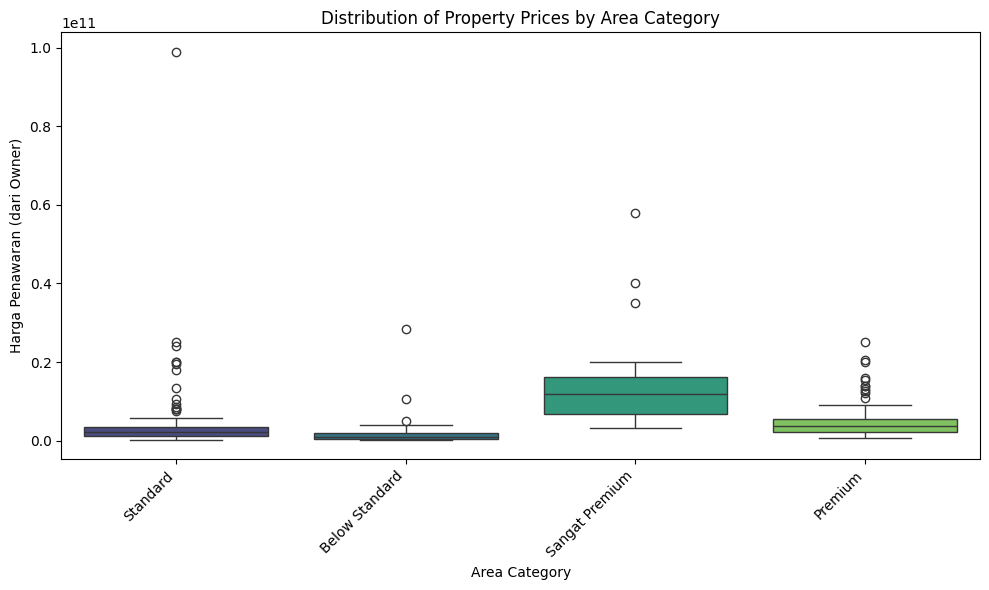

In [11]:
# Box plot of HargaPenawaran by AreaCategory
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='AreaCategory', y='HargaPenawaran', palette='viridis')
plt.title('Distribution of Property Prices by Area Category')
plt.xlabel('Area Category')
plt.ylabel('Harga Penawaran (dari Owner)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Interpretation:**

1. **General Trend:**  
   Property prices tend to increase with the area category — from *Below Standard* → *Standard* → *Premium* → *Sangat Premium*.  
   This indicates that the **location quality strongly influences property prices**.

2. **Below Standard Areas:**  
   - Have the **lowest median prices** and **smallest price variation**.  
   - Most properties are low-priced with a few outliers (rare high-value listings).

3. **Standard Areas:**  
   - Prices are moderately higher than *Below Standard*.  
   - Some outliers indicate a few premium properties even in standard zones.

4. **Premium Areas:**  
   - Higher prices than *Standard* but with **less variation** compared to *Sangat Premium*.  
   - Suggests a more uniform property market in premium areas.

5. **Sangat Premium Areas:**  
   - Have the **highest median prices** and **widest spread**.  
   - Reflects a mix of luxury properties with diverse values.

6. **Outliers Across All Categories:**  
   - Outliers appear in every area, showing **unique or exceptional properties** exist everywhere, though more frequent in high-end zones.

Property prices **increase and vary more** as the area category becomes more premium.  
“Sangat Premium” zones show the **highest median** and **most diverse prices**, indicating a concentration of luxury properties and wide market segmentation.


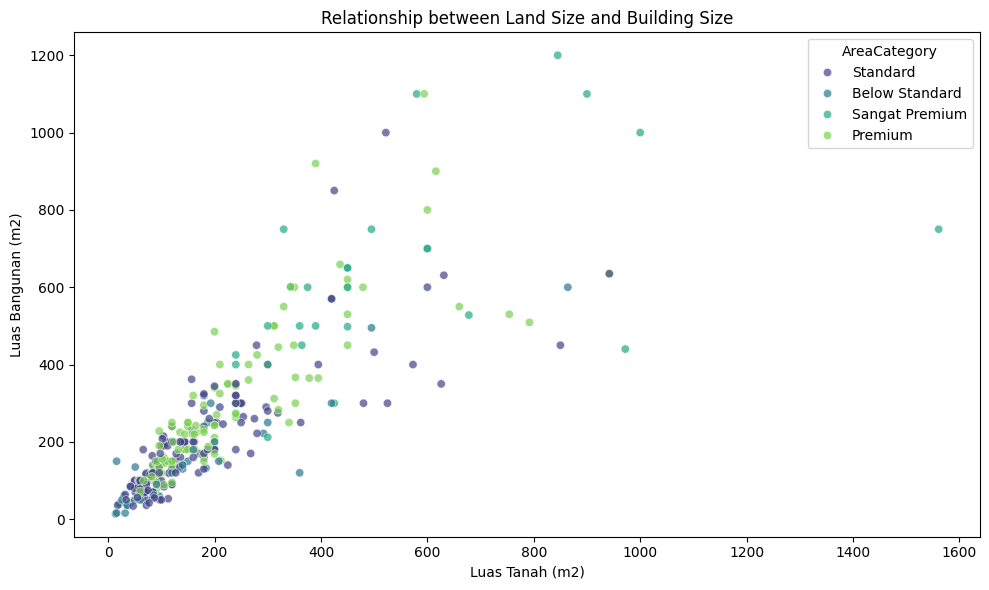

In [12]:
# Scatter plot of LuasTanahM2 vs LuasBangunanM2
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='LuasTanahM2', y='LuasBangunanM2', hue='AreaCategory', palette='viridis', alpha=0.7)
plt.title('Relationship between Land Size and Building Size')
plt.xlabel('Luas Tanah (m2)')
plt.ylabel('Luas Bangunan (m2)')
plt.tight_layout()
plt.show()

**Interpretation:**

1. **Positive Correlation:**  
   There is a clear **positive relationship** between land size (*Luas Tanah*) and building size (*Luas Bangunan*).  
   As the land area increases, the building area also tends to increase — meaning larger plots generally have larger houses.

2. **Area Category Distribution:**  
   - Properties from **Sangat Premium** and **Premium** categories dominate the upper-right region, showing **larger land and building sizes**.  
   - **Standard** and **Below Standard** areas cluster toward the lower-left region, indicating **smaller properties overall**.

3. **Variation in Premium Areas:**  
   - In *Premium* and *Sangat Premium* areas, there is **greater diversity in both land and building size**, suggesting a mix of property types (e.g., villas, luxury homes, large estates).

4. **Compact Development in Lower Areas:**  
   - *Below Standard* and *Standard* areas show **denser clustering** and smaller land-to-building ratios, which may reflect **urban housing or compact residential designs**.

5. **Overall Insight:**  
   Higher area categories are generally associated with **larger and more varied property sizes**, while lower categories are **smaller and more uniform** in size.

The size of a property (both land and building) increases with the area’s quality.  
Premium zones offer **spacious, diverse properties**, while standard zones focus on **compact, efficient land use**.


## Data Transformation

In [13]:
# duplicate df
df_encoded = df.copy()

from sklearn.preprocessing import OrdinalEncoder

# Nominal Encoding
nominal_cols = ['AreaCategory', 'ArahHadapRumah', 'PosisiRumah','LebarJalanROW']
encoder = OrdinalEncoder()
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols])

# Build a mapping dictionary
encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df_encoded.sample(n = 5)

{'ArahHadapRumah': {'Barat': 0, 'Selatan': 1, 'Timur': 2, 'Utara': 3},
 'AreaCategory': {'Below Standard': 0,
                  'Premium': 1,
                  'Sangat Premium': 2,
                  'Standard': 3},
 'LebarJalanROW': {'1-2 Mobil': 0, '< 1 Mobil': 1, '> 2 Mobil': 2},
 'PosisiRumah': {'Cul De Sac/Ujung Gang Buntu': 0,
                 'Kantong Belakang/Ngantong': 1,
                 'Standard': 2,
                 'Tikungan/Hook': 3,
                 'Tusuk Sate': 4}}


,AreaCategory,LuasTanahM2,LuasBangunanM2,JumlahKamar,JumlahKamarMandi,TingkatLantai,HargaPenawaran,ArahHadapRumah,PosisiRumah,LebarJalanROW
209,3.0,34,50,2,2,2,825000000,3.0,4.0,0.0
157,2.0,495,750,7,5,2,5500000000,3.0,2.0,2.0
251,0.0,420,300,4,2,1,10500000000,2.0,2.0,2.0
276,3.0,55,56,2,2,2,1150000000,2.0,2.0,0.0
188,0.0,140,130,3,2,1,1100000000,0.0,2.0,0.0


In [14]:
# Create a StandardScaler object
sc = StandardScaler()
df_scaled = df.copy

# Fit and transform the selected columns
df_scaled= sc.fit_transform(df[['LuasTanahM2', 'LuasBangunanM2', 'JumlahKamar', 'JumlahKamarMandi', 'TingkatLantai', 'HargaPenawaran']])

df_scaled = pd.DataFrame(df_scaled, columns=['LuasTanahM2', 'LuasBangunanM2', 'JumlahKamar', 'JumlahKamarMandi', 'TingkatLantai', 'HargaPenawaran'])
df_scaled.head()

,LuasTanahM2,LuasBangunanM2,JumlahKamar,JumlahKamarMandi,TingkatLantai,HargaPenawaran
0,0.058257,0.150955,-0.158643,-0.204208,0.311439,-0.185959
1,-0.976900,-0.969192,-1.375580,-1.429459,0.311439,-0.570229
2,-0.286795,-0.455792,0.449825,0.408417,0.311439,-0.281661
3,-0.202997,-0.082409,0.449825,1.021042,0.311439,-0.233810
4,0.600482,1.551139,0.449825,1.021042,0.311439,-0.006516


In [15]:
# get stastical information on the new dataset
df_scaled.describe()

,LuasTanahM2,LuasBangunanM2,JumlahKamar,JumlahKamarMandi,TingkatLantai,HargaPenawaran
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02
mean,7.035077e-17,-5.862564e-18,4.690051e-17,-7.035077e-17,-1.348390e-16,-4.690051e-17
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00
min,-1.055769e+00,-1.183887e+00,-1.984048e+00,-1.429459e+00,-1.654519e+00,-5.855170e-01
25%,-6.515649e-01,-6.891556e-01,-7.671116e-01,-8.168336e-01,3.114389e-01,-4.371780e-01
50%,-3.213005e-01,-3.157731e-01,-1.586435e-01,-2.042084e-01,3.114389e-01,-2.816613e-01
75%,3.269050e-01,3.469808e-01,4.498246e-01,4.084168e-01,3.114389e-01,-1.847914e-02
max,6.569888e+00,4.351508e+00,5.317569e+00,5.922044e+00,4.243355e+00,1.123854e+01


In [16]:
# Combine df_encoded and df_scaled
# Ensure both dataframes have the same index before concatenating
df_encoded.reset_index(drop=True, inplace=True)
df_scaled.reset_index(drop=True, inplace=True)

df_combined = pd.concat([df_encoded, df_scaled], axis=1)

display(df_combined.head())

,AreaCategory,LuasTanahM2,LuasBangunanM2,JumlahKamar,JumlahKamarMandi,TingkatLantai,HargaPenawaran,ArahHadapRumah,PosisiRumah,LebarJalanROW,LuasTanahM2,LuasBangunanM2,JumlahKamar,JumlahKamarMandi,TingkatLantai,HargaPenawaran
0,3.0,240,300,4,3,2,3500000000,3.0,2.0,0.0,0.058257,0.150955,-0.158643,-0.204208,0.311439,-0.185959
1,0.0,30,60,2,1,2,287799000,3.0,2.0,1.0,-0.976900,-0.969192,-1.375580,-1.429459,0.311439,-0.570229
2,3.0,170,170,5,4,2,2699999999,1.0,0.0,0.0,-0.286795,-0.455792,0.449825,0.408417,0.311439,-0.281661
3,2.0,187,250,5,5,2,3100000000,3.0,2.0,0.0,-0.202997,-0.082409,0.449825,1.021042,0.311439,-0.233810
4,1.0,350,600,5,5,2,5000000000,0.0,2.0,0.0,0.600482,1.551139,0.449825,1.021042,0.311439,-0.006516


## Silhouette Score

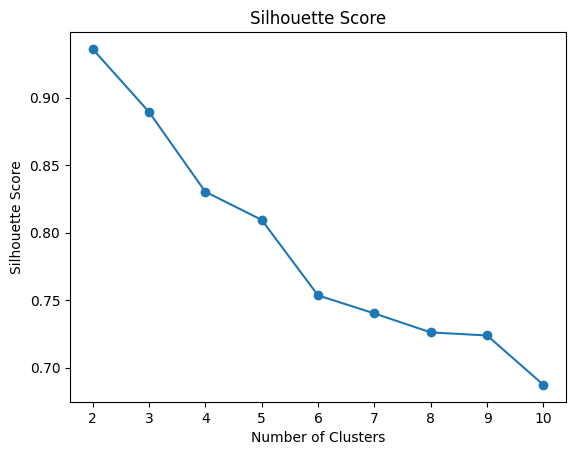

In [17]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_combined)
    silhouette_avg = silhouette_score(df_combined, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

## Comparing Silhouette Score to get best combination of linkage and metric

Skipping Ward linkage with Manhattan metric (not supported).


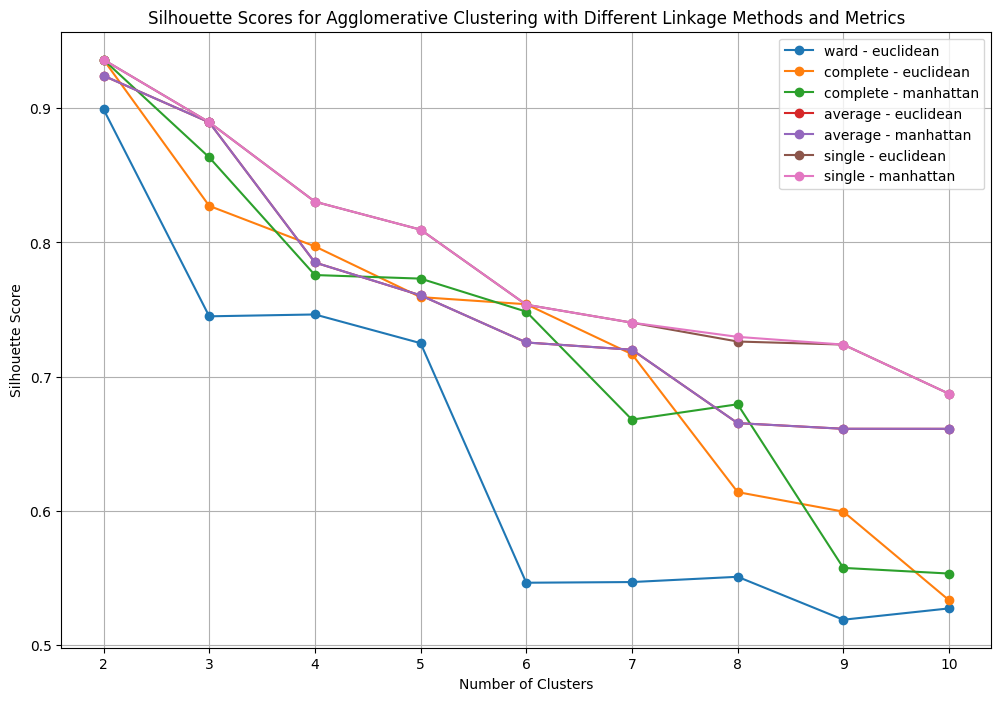

Best Silhouette Score: 0.9360874149243983
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: euclidean


In [18]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_combined)
            silhouette_avg = silhouette_score(df_combined, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

Best Silhouette Score: 0.8486724455071071

Optimal Number of Clusters: 2

Optimal Linkage Method: complete

Optimal Metric: euclidean

## Dendogram Visualization

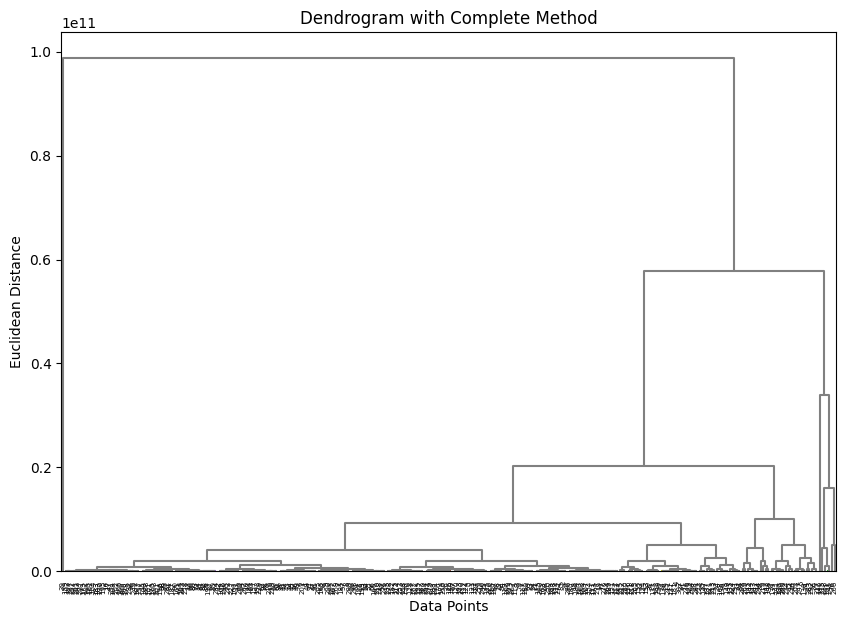

In [19]:
# Using the best combination of parameters
linked = linkage(df_combined, method='complete', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, above_threshold_color="grey", color_threshold=7.5)
plt.title("Dendrogram with Complete Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


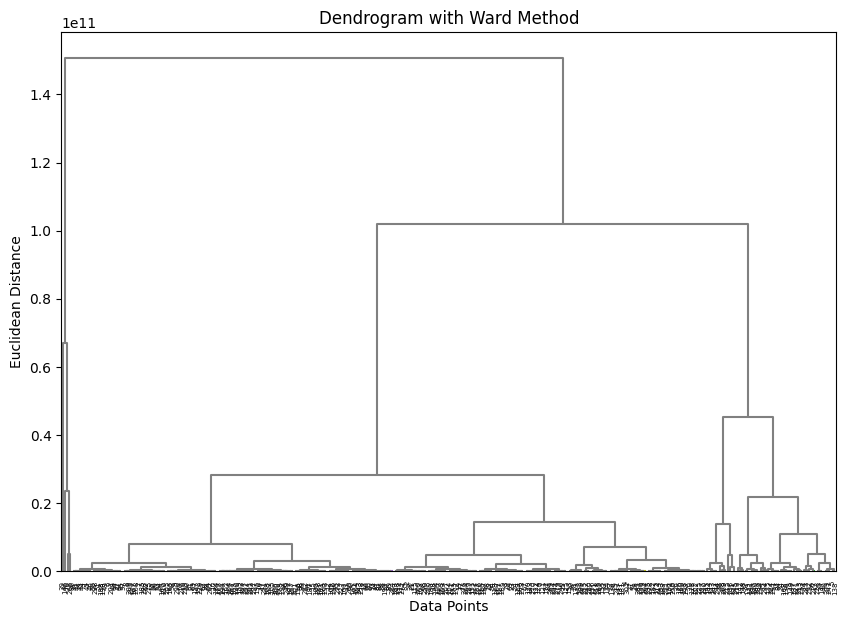

In [20]:
# Ward Method
linked = linkage(df_combined, method='ward', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, above_threshold_color="grey", color_threshold=7.5)
plt.title("Dendrogram with Ward Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

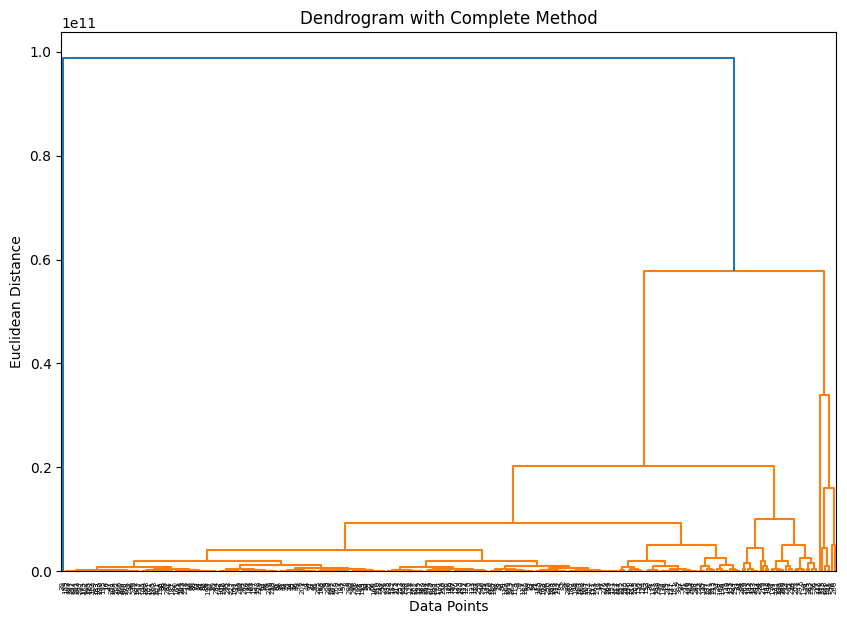

In [21]:
# Max Distance
linked = linkage(df_combined, method='complete', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Complete Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

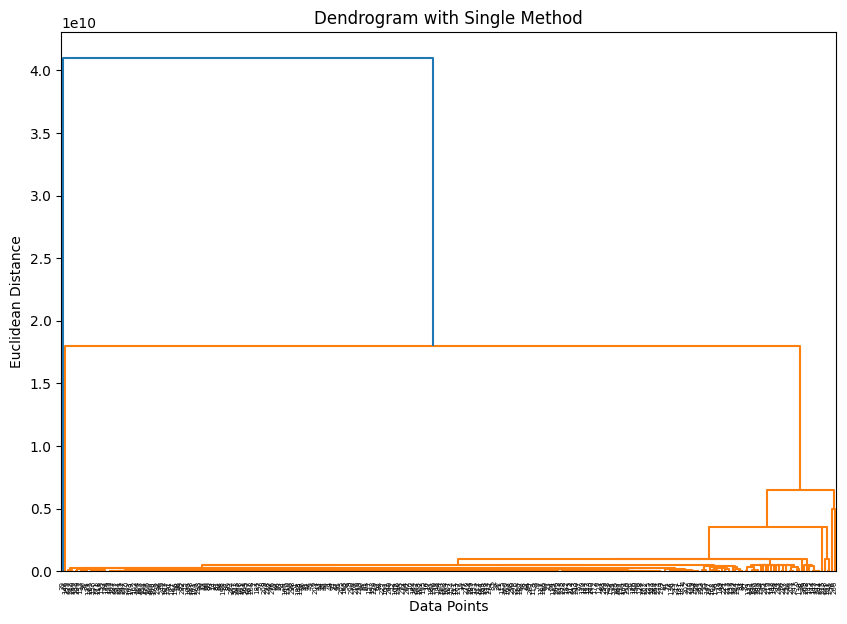

In [22]:
# Min Distance
linked = linkage(df_combined, method='single')

# Plot dendrogram dengan color_threshold yang sesuai
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Single Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

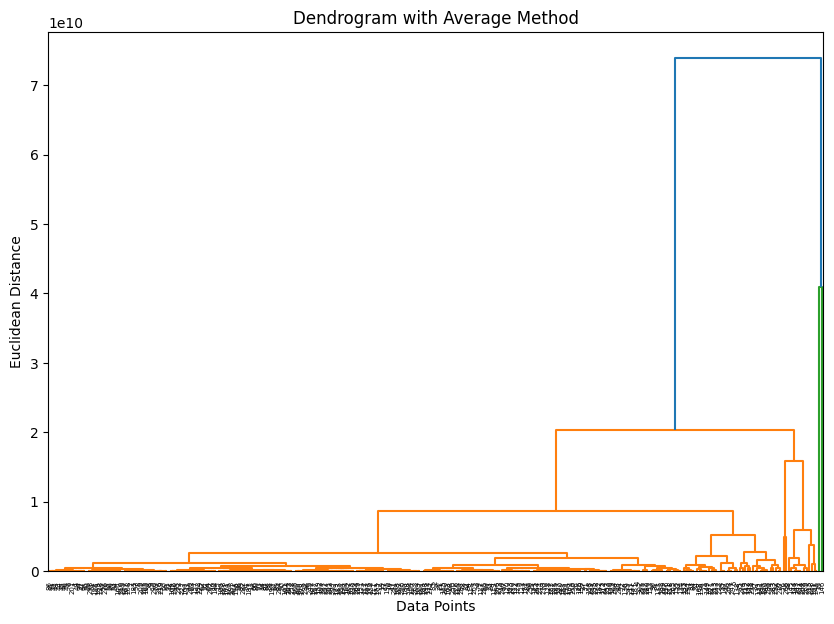

In [23]:
# Average Distance
linked = linkage(df_combined, method='average', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Average Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Hierarchical Clustering Model

### Best Param

In [24]:
# Hierarchical Clustering using best parameters
agglo_best = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc_best = agglo_best.fit_predict(df_combined)

In [25]:
# Evaluation
ss = silhouette_score(df_combined, y_hc_best)
print(ss)

0.9360874149243983


### Ward Method

In [26]:
# Hierarchical Clustering
agglo_ward = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='ward', metric=best_metric)
y_hc_ward = agglo_ward.fit_predict(df_combined)

In [27]:
# Evaluation
ss = silhouette_score(df_combined, y_hc_ward)
print(ss)

0.8991296163271862


## Dendogram Visualization for Hierarchical Clustering Model

### Best

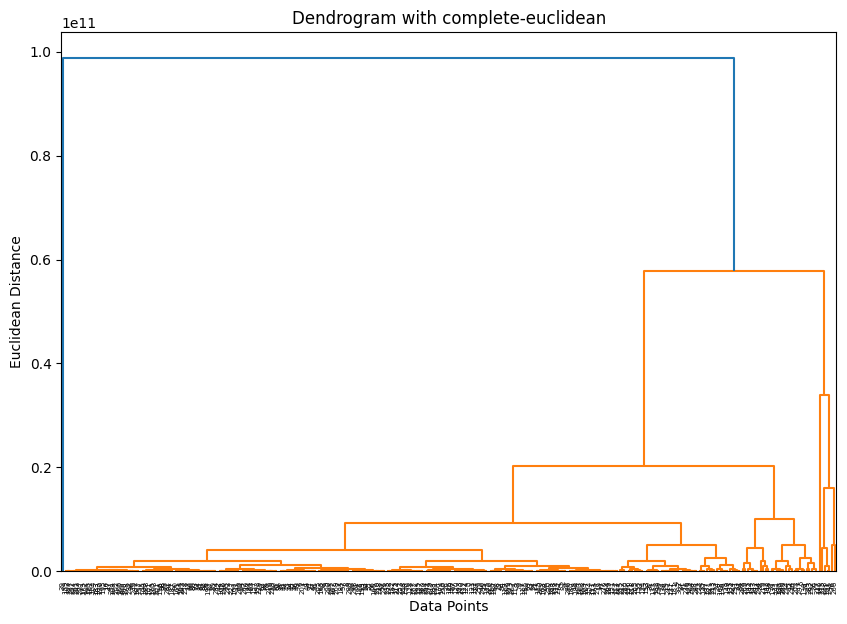

In [28]:
# Average Distance
linked = linkage(df_combined, method=best_linkage, metric=best_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + "-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

### Ward

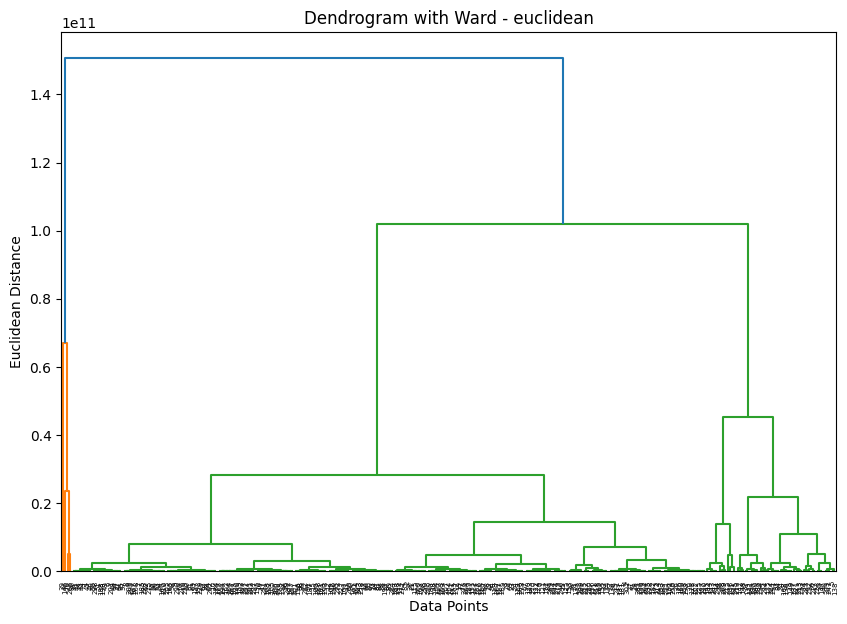

In [29]:
# Average Distance
linked = linkage(df_combined, method='ward', metric=best_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Ward - " + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Merge with the original data

## Best Param (Complete-Euclidean)

In [43]:
# Add the cluster labels to the original data
df['Agglo'] = y_hc_best

# Analyze the clusters with the original values
df.head()

,AreaCategory,LuasTanahM2,LuasBangunanM2,JumlahKamar,JumlahKamarMandi,TingkatLantai,HargaPenawaran,ArahHadapRumah,PosisiRumah,LebarJalanROW,Agglo
0,Standard,240,300,4,3,2,3500000000,Utara,Standard,1-2 Mobil,0
1,Below Standard,30,60,2,1,2,287799000,Utara,Standard,< 1 Mobil,0
2,Standard,170,170,5,4,2,2699999999,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil,0
3,Sangat Premium,187,250,5,5,2,3100000000,Utara,Standard,1-2 Mobil,0
4,Premium,350,600,5,5,2,5000000000,Barat,Standard,1-2 Mobil,0


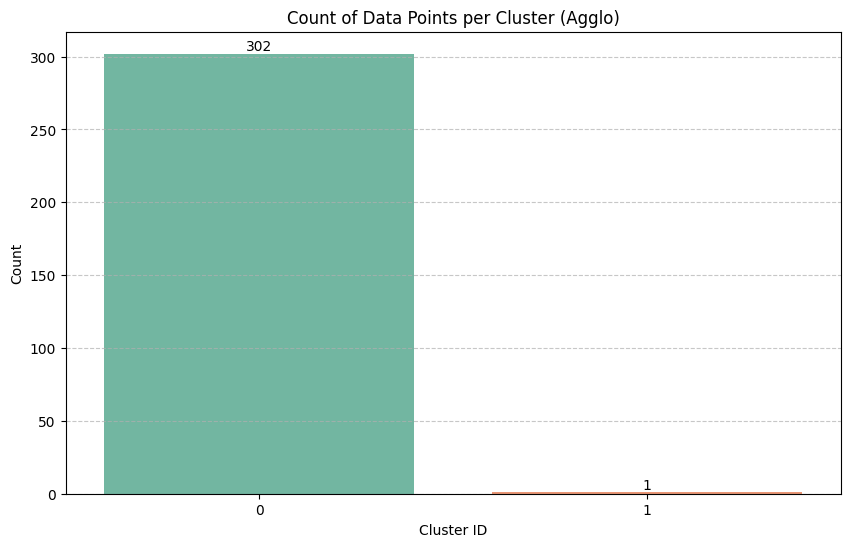

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Statistical Summary for each cluster

In [45]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(y_hc_best).agg({
    'LuasTanahM2': ['mean', 'median'],
    'LuasBangunanM2': ['mean', 'median'],
    'JumlahKamar': ['mean', 'median'],
    'JumlahKamarMandi': ['mean', 'median'],
    'TingkatLantai': ['mean', 'median'],
    'AreaCategory': ['first', 'count'],
    'LebarJalanROW': ['first', 'count'],
    'PosisiRumah': ['first', 'count'],
    'ArahHadapRumah': ['first', 'count']
})

# Rename the <lambda> column in the Gender MultiIndex level
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

LuasTanahM2        LuasBangunanM2        JumlahKamar         \
               mean median           mean median        mean median   
cluster                                                               
0        226.950331  162.5     266.556291  200.0    4.251656    4.0   
1        600.000000  600.0     600.000000  600.0    7.000000    7.0   

        JumlahKamarMandi        TingkatLantai        AreaCategory        \
                    mean median          mean median         mode count   
cluster                                                                   
0               3.327815    3.0      1.844371    2.0     Standard   302   
1               5.000000    5.0      1.000000    1.0     Standard     1   

        LebarJalanROW       PosisiRumah       ArahHadapRumah        
                 mode count        mode count           mode count  
cluster                                                             
0           1-2 Mobil   302    Standard   302          Utara   302  
1           1-2 Mobil     1    Standard     1          Barat     1

## Ward Method

In [46]:
# Add the cluster labels to the original data
df['Agglo'] = y_hc_ward

# Analyze the clusters with the original values
df.head()

,AreaCategory,LuasTanahM2,LuasBangunanM2,JumlahKamar,JumlahKamarMandi,TingkatLantai,HargaPenawaran,ArahHadapRumah,PosisiRumah,LebarJalanROW,Agglo
0,Standard,240,300,4,3,2,3500000000,Utara,Standard,1-2 Mobil,0
1,Below Standard,30,60,2,1,2,287799000,Utara,Standard,< 1 Mobil,0
2,Standard,170,170,5,4,2,2699999999,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil,0
3,Sangat Premium,187,250,5,5,2,3100000000,Utara,Standard,1-2 Mobil,0
4,Premium,350,600,5,5,2,5000000000,Barat,Standard,1-2 Mobil,0


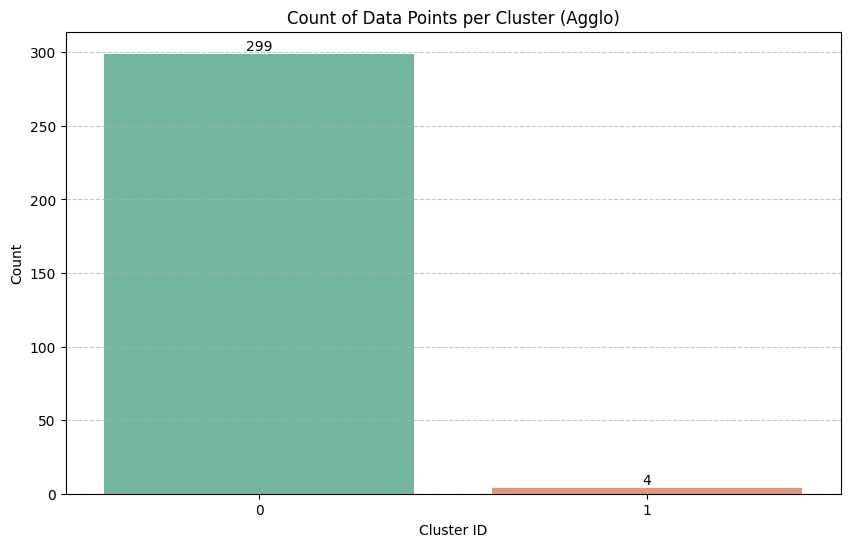

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [48]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(y_hc_ward).agg({
    'LuasTanahM2': ['mean', 'median'],
    'LuasBangunanM2': ['mean', 'median'],
    'JumlahKamar': ['mean', 'median'],
    'JumlahKamarMandi': ['mean', 'median'],
    'TingkatLantai': ['mean', 'median'],
    'AreaCategory': ['first', 'count'],
    'LebarJalanROW': ['first', 'count'],
    'PosisiRumah': ['first', 'count'],
    'ArahHadapRumah': ['first', 'count']
})

# Rename the <lambda> column in the Gender MultiIndex level
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary


LuasTanahM2        LuasBangunanM2         JumlahKamar         \
               mean median           mean  median        mean median   
cluster                                                                
0        220.046823  162.0      258.19398   200.0    4.234114    4.0   
1        836.250000  872.5      975.00000  1050.0    6.250000    6.5   

        JumlahKamarMandi        TingkatLantai        AreaCategory        \
                    mean median          mean median         mode count   
cluster                                                                   
0               3.301003    3.0      1.839465    2.0     Standard   299   
1               5.750000    5.0      2.000000    2.0     Standard     4   

        LebarJalanROW       PosisiRumah       ArahHadapRumah        
                 mode count        mode count           mode count  
cluster                                                             
0           1-2 Mobil   299    Standard   299          Utara   299  
1           1-2 Mobil     4    Standard     4          Barat     4

**Evaluation Results:**
- **Complete (Euclidean)**  
  - Best parameter score: **0.9361**  
  - Data points per cluster: **302 – 1**  
- **Ward Method**  
  - Evaluation score: **0.8991**  
  - Data points per cluster: **299 – 4**

**Interpretation:**
- The **Complete (Euclidean)** method achieves a **higher evaluation score (0.9361)** than the Ward method, indicating **better-defined and more separated clusters**.
- However, the **cluster balance** is poor — one large cluster (302 points) and one very small cluster (1 point).  
  This suggests the segmentation may be **overfitted or less meaningful** in real-world terms.
- The **Ward method**, while having a slightly lower evaluation score (0.8991), produces **more balanced clusters (299–4)**, meaning it likely captures **more meaningful segmentation patterns** within the data.

Even though the Complete method has a higher numeric score, the **Ward method provides more practical and interpretable segmentation**, as it avoids extreme imbalance and better represents meaningful group differences in the dataset.


# Implikasi Manajerial Berdasarkan Hasil Clustering <br>

1. **Cluster 0 – Standard Family Homes**  
   - Represents the **majority (≈99%)** of the dataset.  
   - Properties are **moderately sized** (land ≈220 m², building ≈260 m²) with around **4 bedrooms and 3 bathrooms**.  
   - Located mostly in *Standard* areas with *1–2 car road access*.  
   - This segment likely represents the **typical urban family housing market**.

2. **Cluster 1 – Large-Lot Premium Houses**  
   - A **small, distinct niche segment** (≈1%) with **very large land (≈836 m²)** and **building sizes (≈975 m²)**.  
   - Typically **6+ bedrooms**, **multi-floor** structures, clearly *luxury or estate-type properties*.  
   - Still categorized as *Standard* area but likely at the **high-end boundary** of that classification.

---

### Business Implications

1. **Pricing Strategy:**  
   - **Cluster 0:** Competitive and volume-based pricing, suitable for **mid-income buyers or families** seeking value for space.  
   - **Cluster 1:** Premium pricing, even though located in “Standard” areas, their **size and features justify higher value** positioning.

2. **Target Market:**  
   - **Cluster 0:** Broad target, family buyers, first-time homeowners, or investors in mid-range housing projects.  
   - **Cluster 1:** Niche luxury buyers, those seeking **spacious estates** or **high-end renovations** within accessible urban zones.

3. **Marketing Approach:**  
   - **Cluster 0:** Focus on **affordability, convenience, and family comfort**.  
   - **Cluster 1:** Emphasize **exclusivity, space, and potential for customization**.

4. **Area Targeting:**  
   - Developers can prioritize *Standard areas* for scalable housing projects (Cluster 0).  
   - Simultaneously, they can explore *larger-lot developments* within or near Standard zones to cater to **upper-middle or luxury market extensions** (Cluster 1).

---

### 💡 Key Takeaway:
The clustering reveals **two clear market segments**

(1) a large mainstream market of *standard family homes*, and  
(2) a small niche of *luxury large-lot properties*.  

This distinction supports **dual pricing and marketing strategies**, allowing developers and agents to **balance volume sales with high-margin luxury projects**.